# Polynomial Regression: Underfitting and Overfitting
This notebook demonstrates underfitting and overfitting using polynomial regression.
We use synthetic data generated from a sine function and fit models of varying complexity.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


## Synthetic Data Generation

We begin by generating synthetic data to simulate a regression problem. Here's what each line does:

- `np.random.seed(0)`: Sets the random seed for reproducibility.
- `n_samples = 100`: Specifies that we want to generate 100 data points.
- `X = np.linspace(0, 1, n_samples)`: Creates 100 evenly spaced values in the interval [0, 1] to serve as input features.
- `y_true = np.sin(2 * np.pi * X)`: Defines the true underlying function as a sine wave with one full period over [0, 1].
- `y = y_true + np.random.normal(scale=0.1, size=X.shape)`: Adds Gaussian noise with standard deviation 0.1 to simulate real-world measurement noise.
- `X = X.reshape(-1, 1)`: Reshapes the 1D array `X` into a 2D array of shape (100, 1), as required by scikit-learn.

This synthetic setup provides a controlled environment where we know the true function and can clearly observe the effects of underfitting and overfitting.


In [2]:

# Generate synthetic data
np.random.seed(0)
n_samples = 100
X = np.linspace(0, 1, n_samples)
y_true = np.sin(2 * np.pi * X)
y = y_true + np.random.normal(scale=0.1, size=X.shape)
X = X.reshape(-1, 1)


Let´s plot the simulated data:

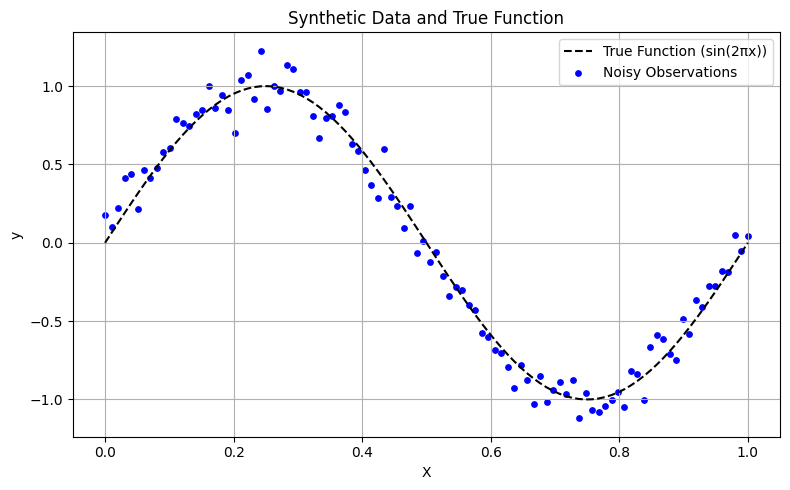

In [ ]:

# Plot
plt.figure(figsize=(8, 5))
plt.plot(X, y_true, label='True Function (sin(2πx))', color='black', linestyle='--')
plt.scatter(X, y, label='Noisy Observations', color='blue', s=15)
plt.title("Synthetic Data and True Function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


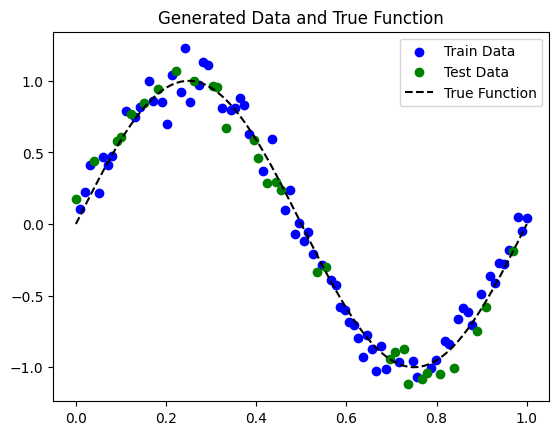

In [4]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X_train, y_train, label='Train Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='green')
plt.plot(X, y_true, label='True Function', color='black', linestyle='--')
plt.legend()
plt.title("Generated Data and True Function")
plt.show()


## Model Fitting with Varying Polynomial Degrees
We now fit models with different polynomial degrees to see how they perform.

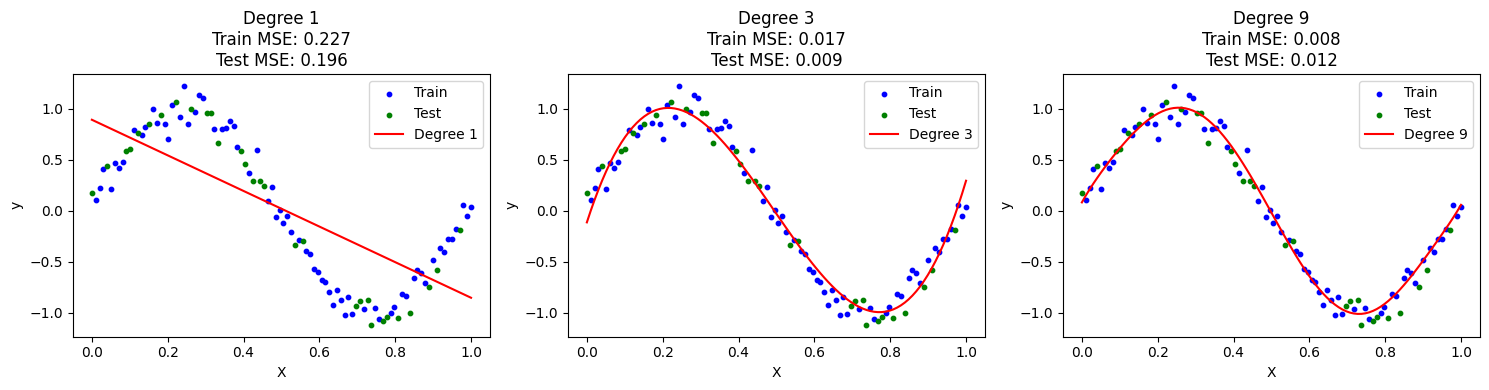

In [5]:
degrees = [1, 3, 9]
plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, label="Train", color='blue', s=10)
    plt.scatter(X_test, y_test, label="Test", color='green', s=10)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}", color='red')
    plt.title(f"Degree {degree}\nTrain MSE: {mean_squared_error(y_train, y_train_pred):.3f}\n"
              f"Test MSE: {mean_squared_error(y_test, y_test_pred):.3f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.tight_layout()
plt.show()


## Bias-Variance Trade-off
The following plot shows the training and test error as a function of the polynomial degree. This helps us visualize underfitting (left), optimal complexity (middle), and overfitting (right).

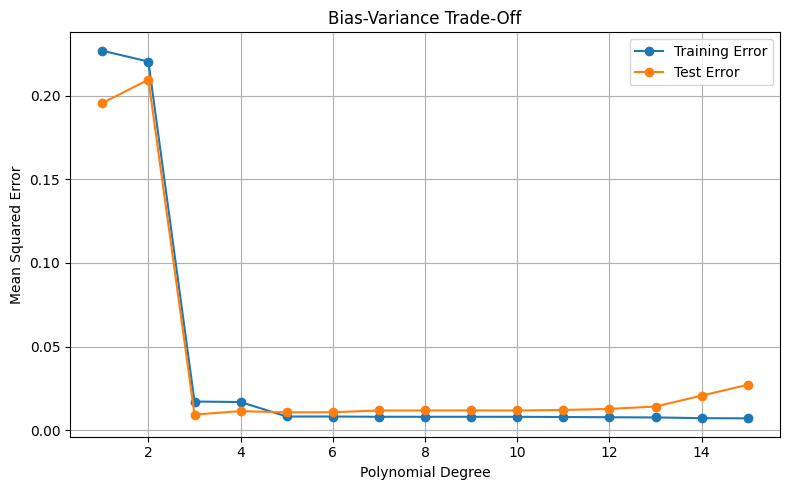

In [7]:

# Re-generate data
np.random.seed(0)
n_samples = 100
X = np.linspace(0, 1, n_samples).reshape(-1, 1)
y_true = np.sin(2 * np.pi * X).ravel()
y = y_true + np.random.normal(scale=0.1, size=X.shape[0])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Evaluate models of increasing complexity
degrees = list(range(1, 16))
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-Off')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
